<a href="https://colab.research.google.com/github/Subhamnation/Signal_Processing_noteboks/blob/main/Signal_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Denoising by Moving Average Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# create signal
srate = 256 # Hz
t  = np.arange(0,3,1/srate)
pnts     = len(t)

# creating a noiseless signal
x = np.sin(2*np.pi * 2 * t)

# creating a random noise
noise  = 5 * np.random.randn(pnts)

# Adding noise on signal
Noisysignal = x + noise

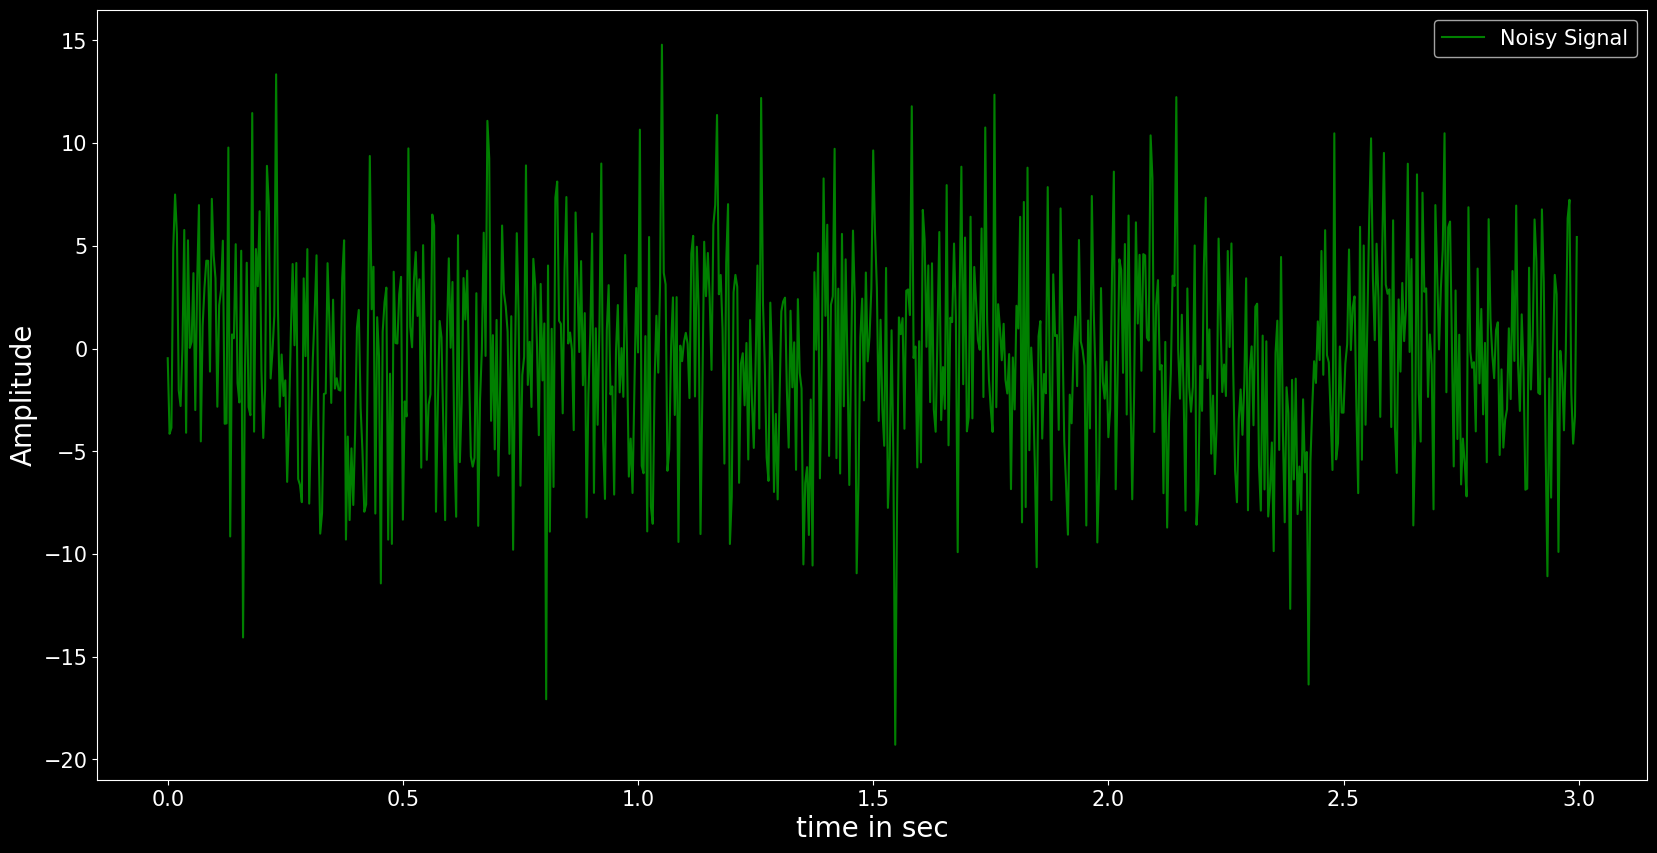

In [5]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g',label = 'Noisy Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [6]:
N = 30                # N = order of moving average  filetr. FilterWindow is actually (2N + 1).
                      #Increasing the order of filter will increase the smoothness of filtered signal

In [7]:
Noisysignal.shape[0]

768

In [8]:
# Initialize denoised signal
filt_sig = np.zeros(Noisysignal.shape[0])

In [9]:
# Applying moving average filter

for i in range(0,Noisysignal.shape[0]):
    filt_sig[i] = np.mean( Noisysignal[i:(2*N + 1) + i])


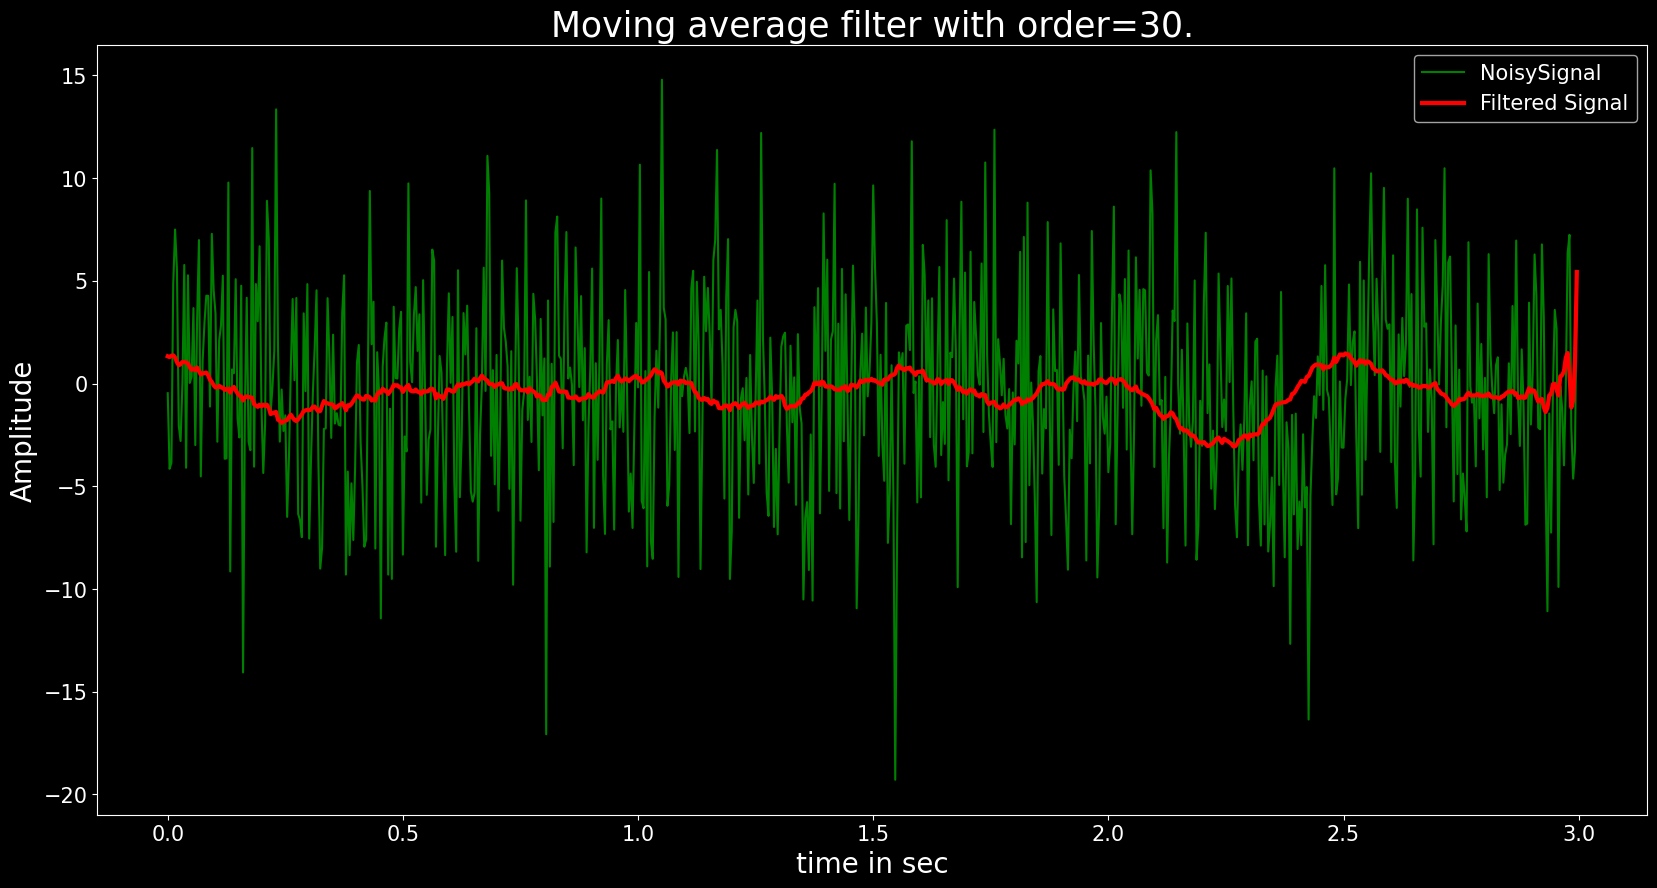

In [10]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g-',label = 'NoisySignal')
plt.plot(t,filt_sig,'r-',linewidth =3,label = 'Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Moving average filter with order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Signal denoising by Gaussian Mean Filter

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [12]:
# create signal
srate = 512 # Hz
t  = np.arange(0,3,1/srate)
pnts     = len(t)

# creating a noiseless signal
x = np.sin(2*np.pi * 2 * t)

# creating a random noise
noise  = 5 * np.random.randn(pnts)

# Adding noise on signal
Noisysignal = x + noise

In [13]:
print(pnts)

1536


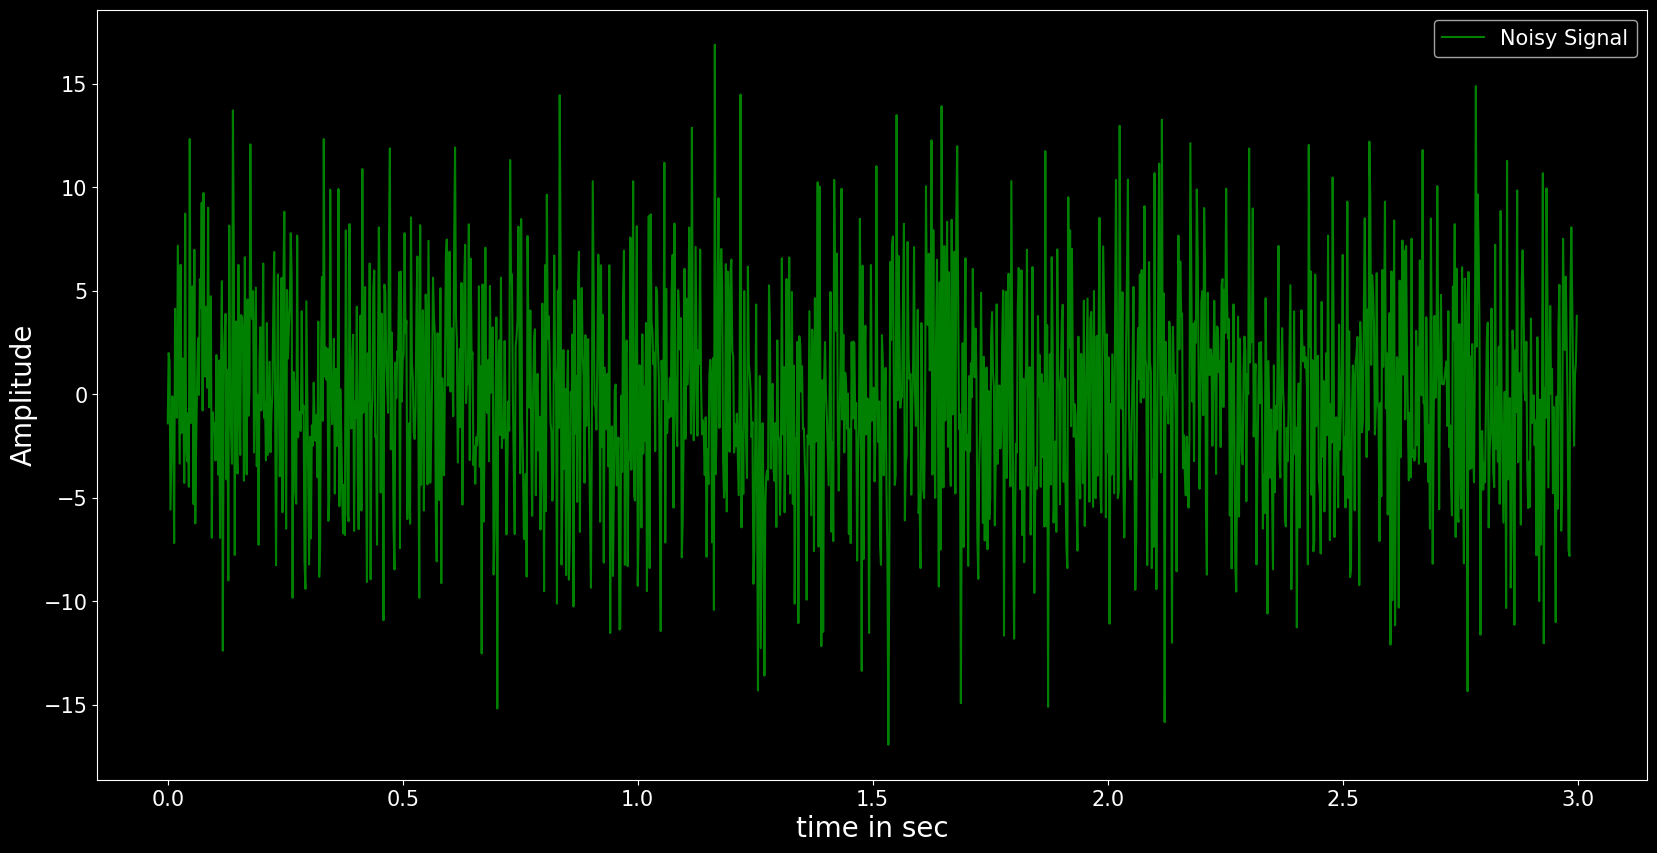

In [14]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Noisysignal,'g',label = 'Noisy Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

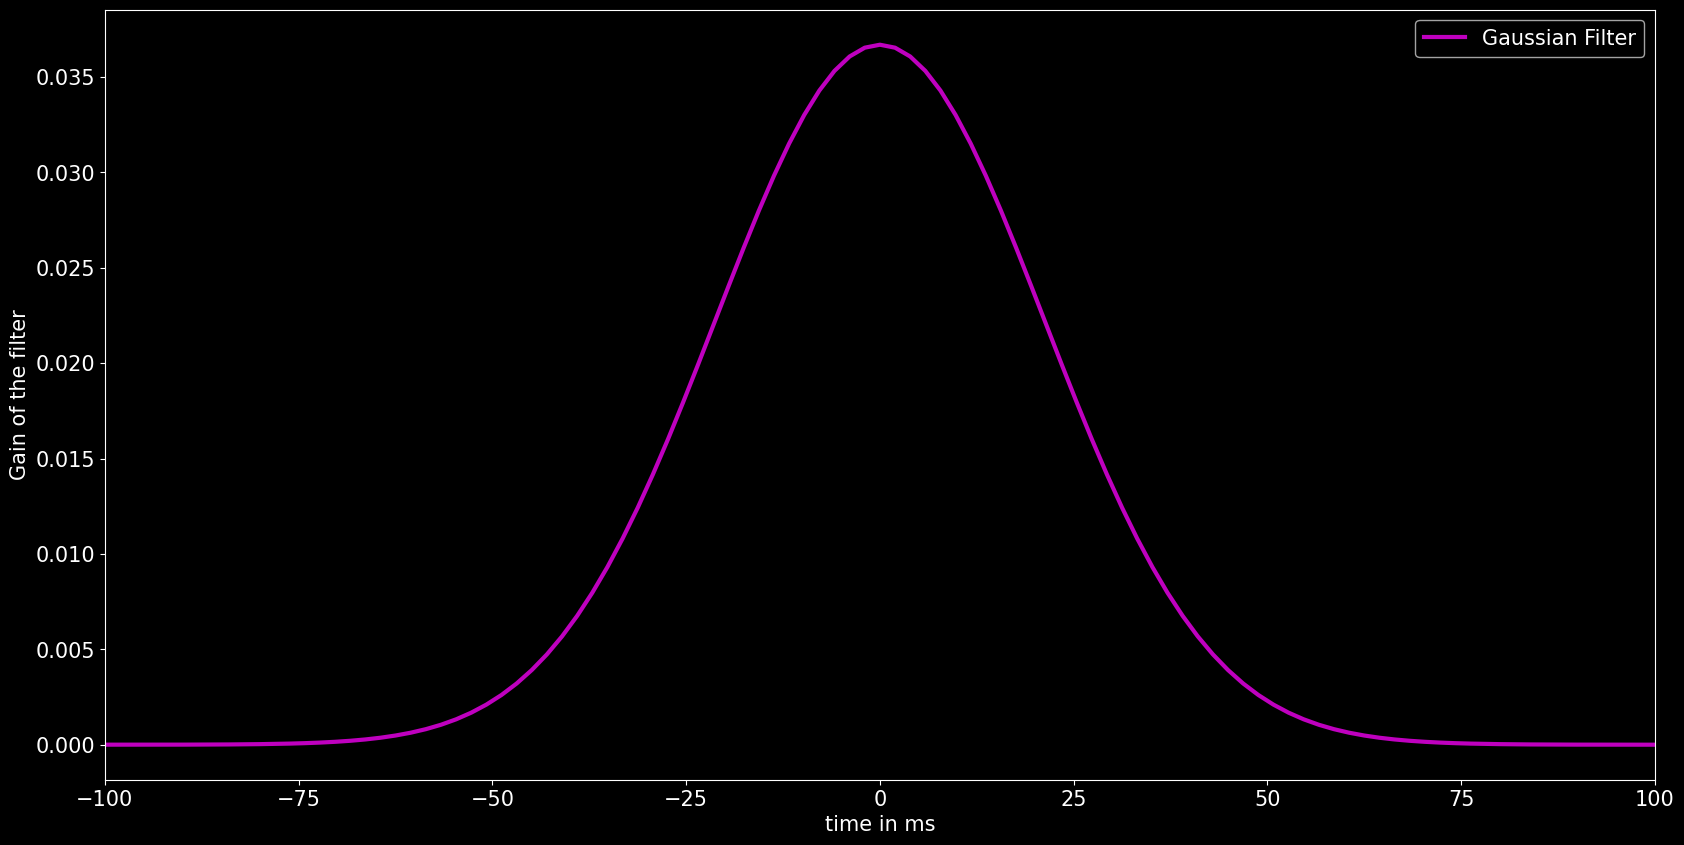

In [15]:
# Generating Gaussian filter / kernel

N = 100
fwhm = 50 # ms # full-width half-maximum
Gtime = 1000 * np.arange(-N,N)/srate # since fwhm is in ms, therefore we multiply it by 1000 to get Gtime in ms
Gfilter = np.exp( -(4*np.log(2)*Gtime**2) / fwhm**2 ) # Generating Gaussian filter
Gfilter = Gfilter /np.sum(Gfilter) # Normalizing the Gaussian Filter


# plotting Gaussian filter / kernel

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Gtime,Gfilter,'m',linewidth =3,label = 'Gaussian Filter')
plt.xlabel('time in ms', fontsize = 15)
plt.ylabel('Gain of the filter', fontsize = 15)
plt.xlim([-100,100])
plt.legend(fontsize = 15)
plt.show()

### Zero padding the noisy siganl to avoid edge effect

In [16]:
sig_4_filter = np.concatenate ((np.zeros(N), Noisysignal, np.zeros(N)), axis= 0)  # zero padding to avoid edge effect

K = len(Noisysignal)

timeindex = np.concatenate ((np.arange(-N,0), np.arange(0,K) ,np.arange(K,K+N)), axis= 0)
time_4_filter = timeindex/srate

In [17]:
print(len(sig_4_filter))
print(len(timeindex))

1736
1736


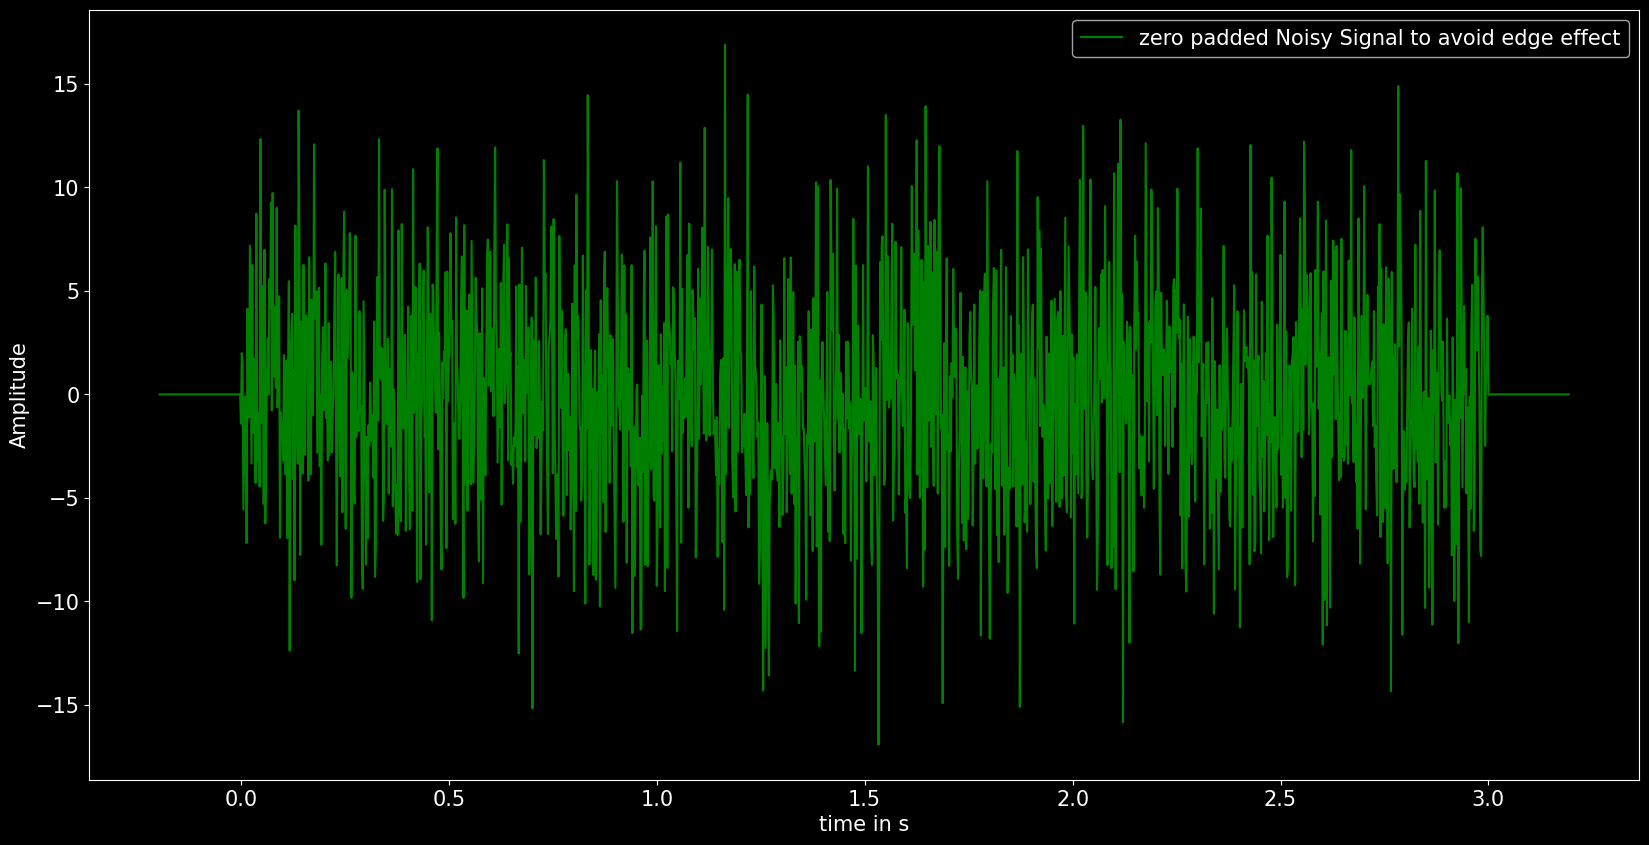

In [18]:
plt.figure( figsize = (20,10))
plt.plot(time_4_filter,sig_4_filter,'g', label = 'zero padded Noisy Signal to avoid edge effect')
plt.xlabel('time in s', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.legend(fontsize = 15)

In [19]:
# Initialize the filtered signal

Gfilt_sig = np.zeros(sig_4_filter.shape[0])

# Applying Gaussian Filter
for i in range(0,Noisysignal.shape[0]):
    Gfilt_sig[i] = np.sum(sig_4_filter[i:2*N+i] * Gfilter)


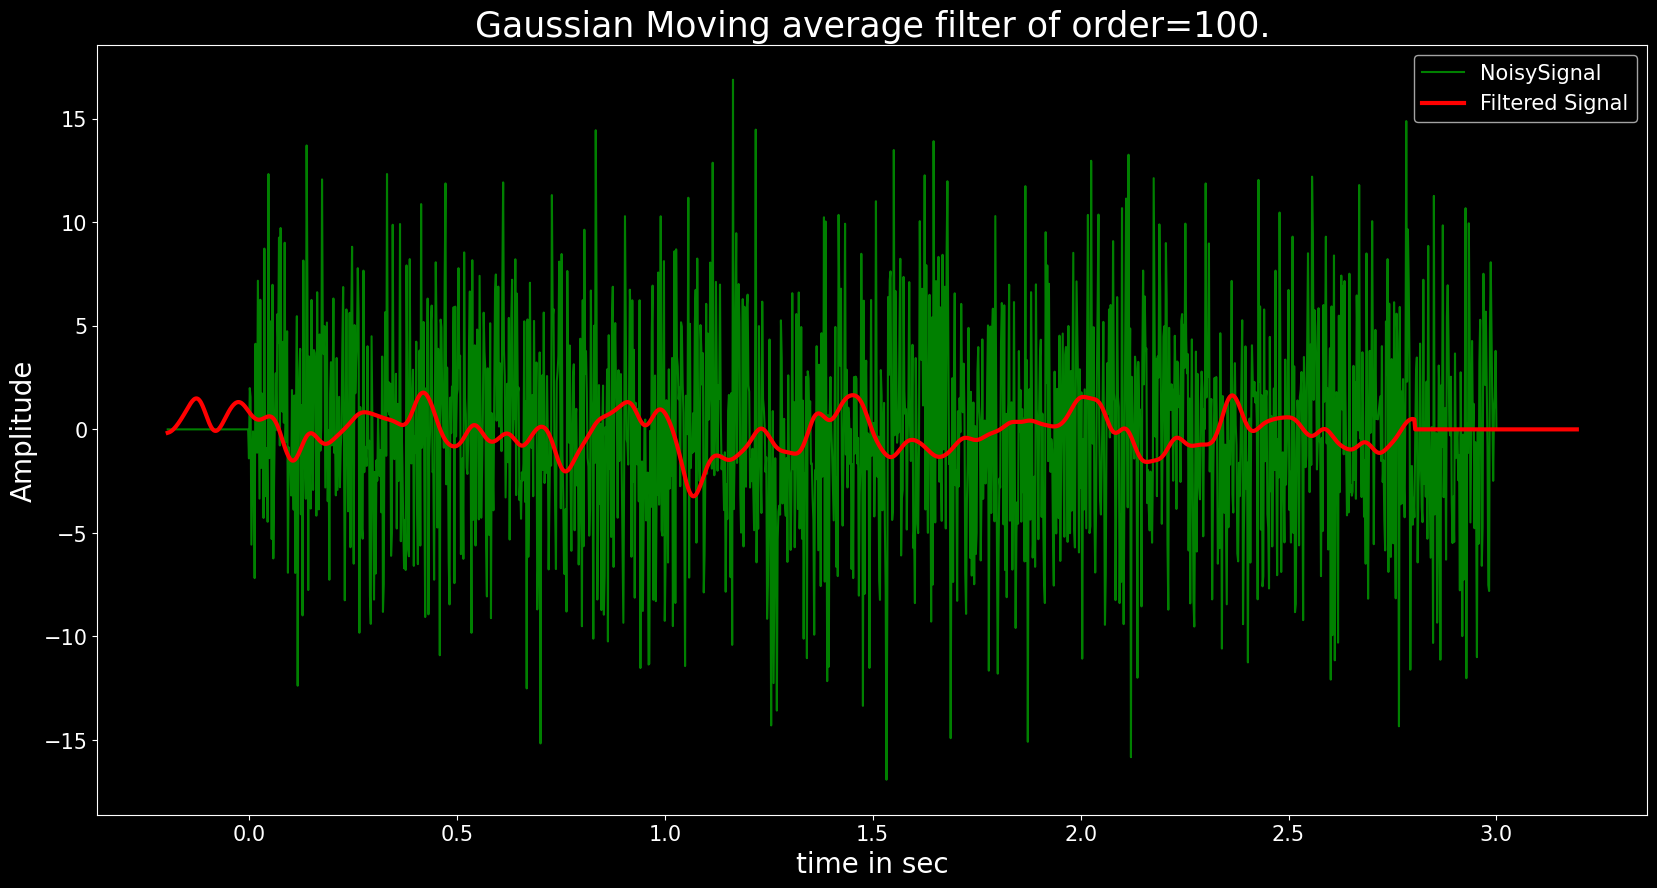

In [20]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(time_4_filter,sig_4_filter,'g-',label = 'NoisySignal')
plt.plot(time_4_filter,Gfilt_sig,'r-',linewidth = 3,label = 'Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Gaussian Moving average filter of order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

In [21]:
Gfilt_sig_clipped = Gfilt_sig[0:K] # clip off the edges to avoid edge effect.

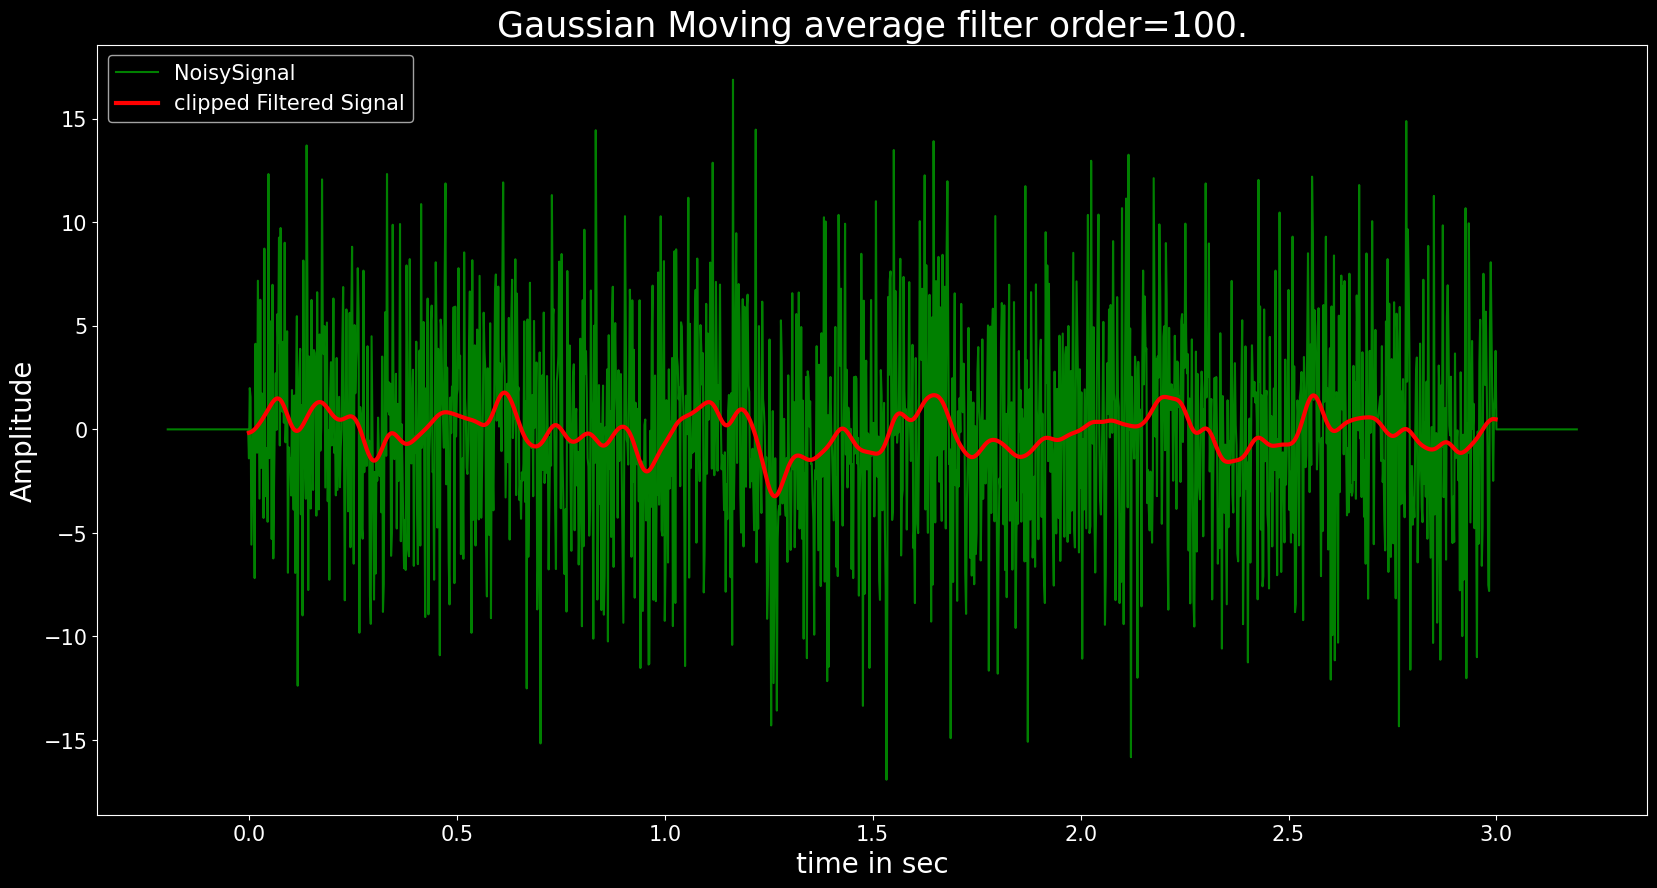

In [22]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(time_4_filter,sig_4_filter,'g-',label = 'NoisySignal')
plt.plot(t,Gfilt_sig_clipped,'r-',linewidth = 3,label = 'clipped Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Gaussian Moving average filter order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Signal denoising by Median Filter

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [24]:
# create signal
srate = 256 # Hz
t  = np.arange(0,3,1/srate)
pnts     = len(t)

# creating a noiseless signal
x = np.sin(2*np.pi * 2 * t)

# creating a random noise
noise  = 5 * np.random.randn(pnts)

# Adding noise on signal
signal = x + noise

print(pnts)

768


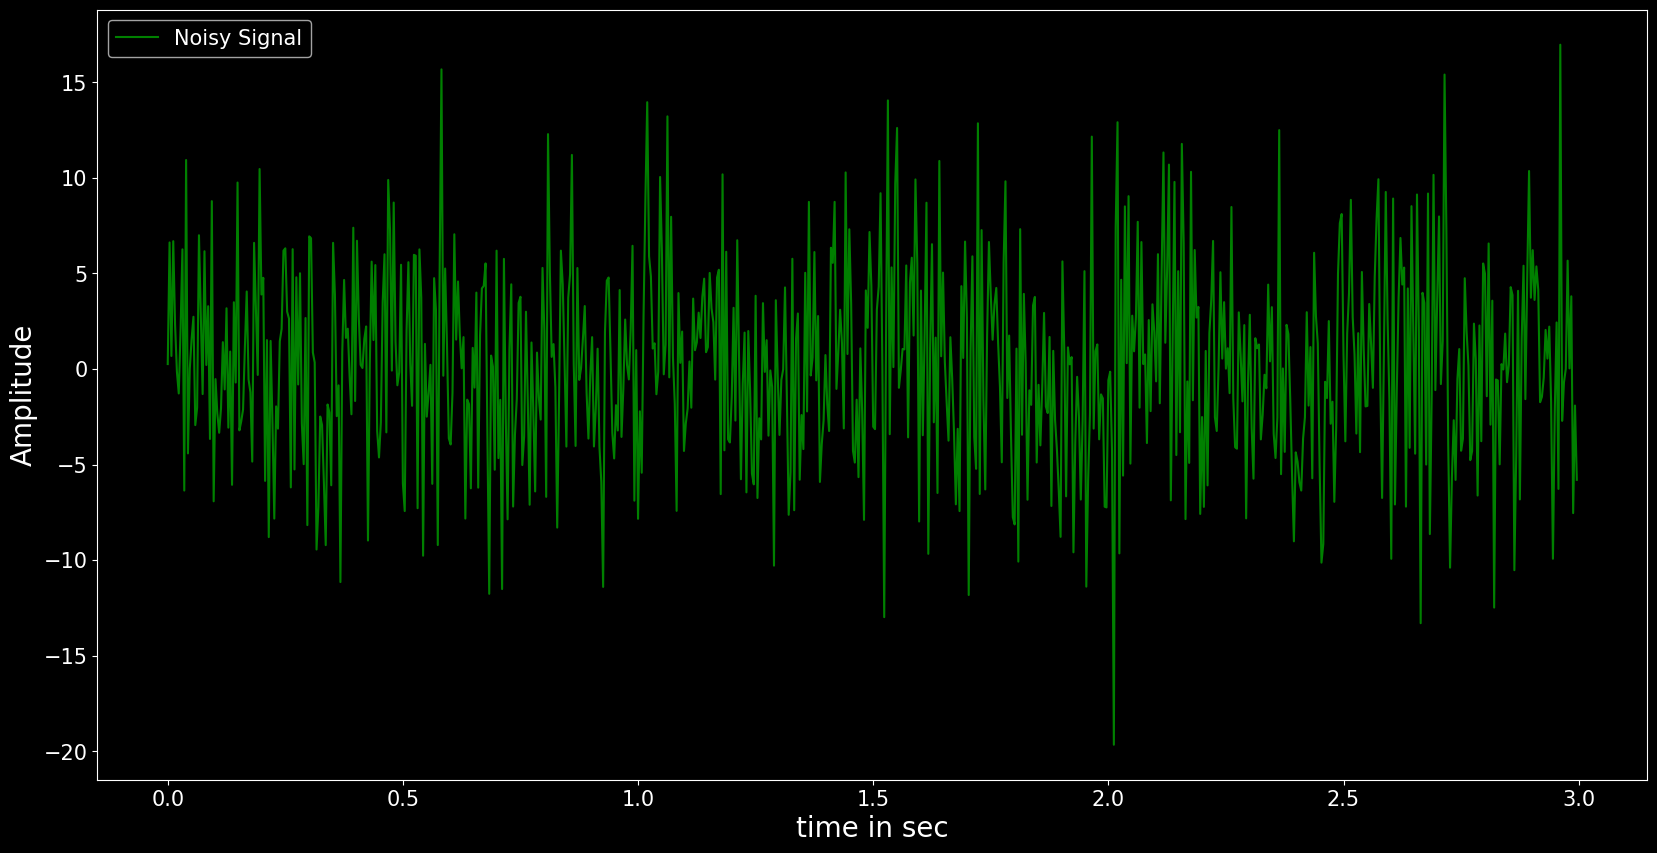

In [25]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,signal,'g',label = 'Noisy Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [26]:
N = 50

# Initialize denoised signal
filt_sig = np.zeros(signal.shape[0])

In [27]:
# Applying Median filter

for i in range(0,signal.shape[0]):
    filt_sig[i] = np.median(signal[i:N+i])


In [28]:
# Applying moving average filter
mean_filt_sig = np.zeros(signal.shape[0])
for i in range(0,signal.shape[0]):
    mean_filt_sig[i] = np.mean(signal[i:N+i])

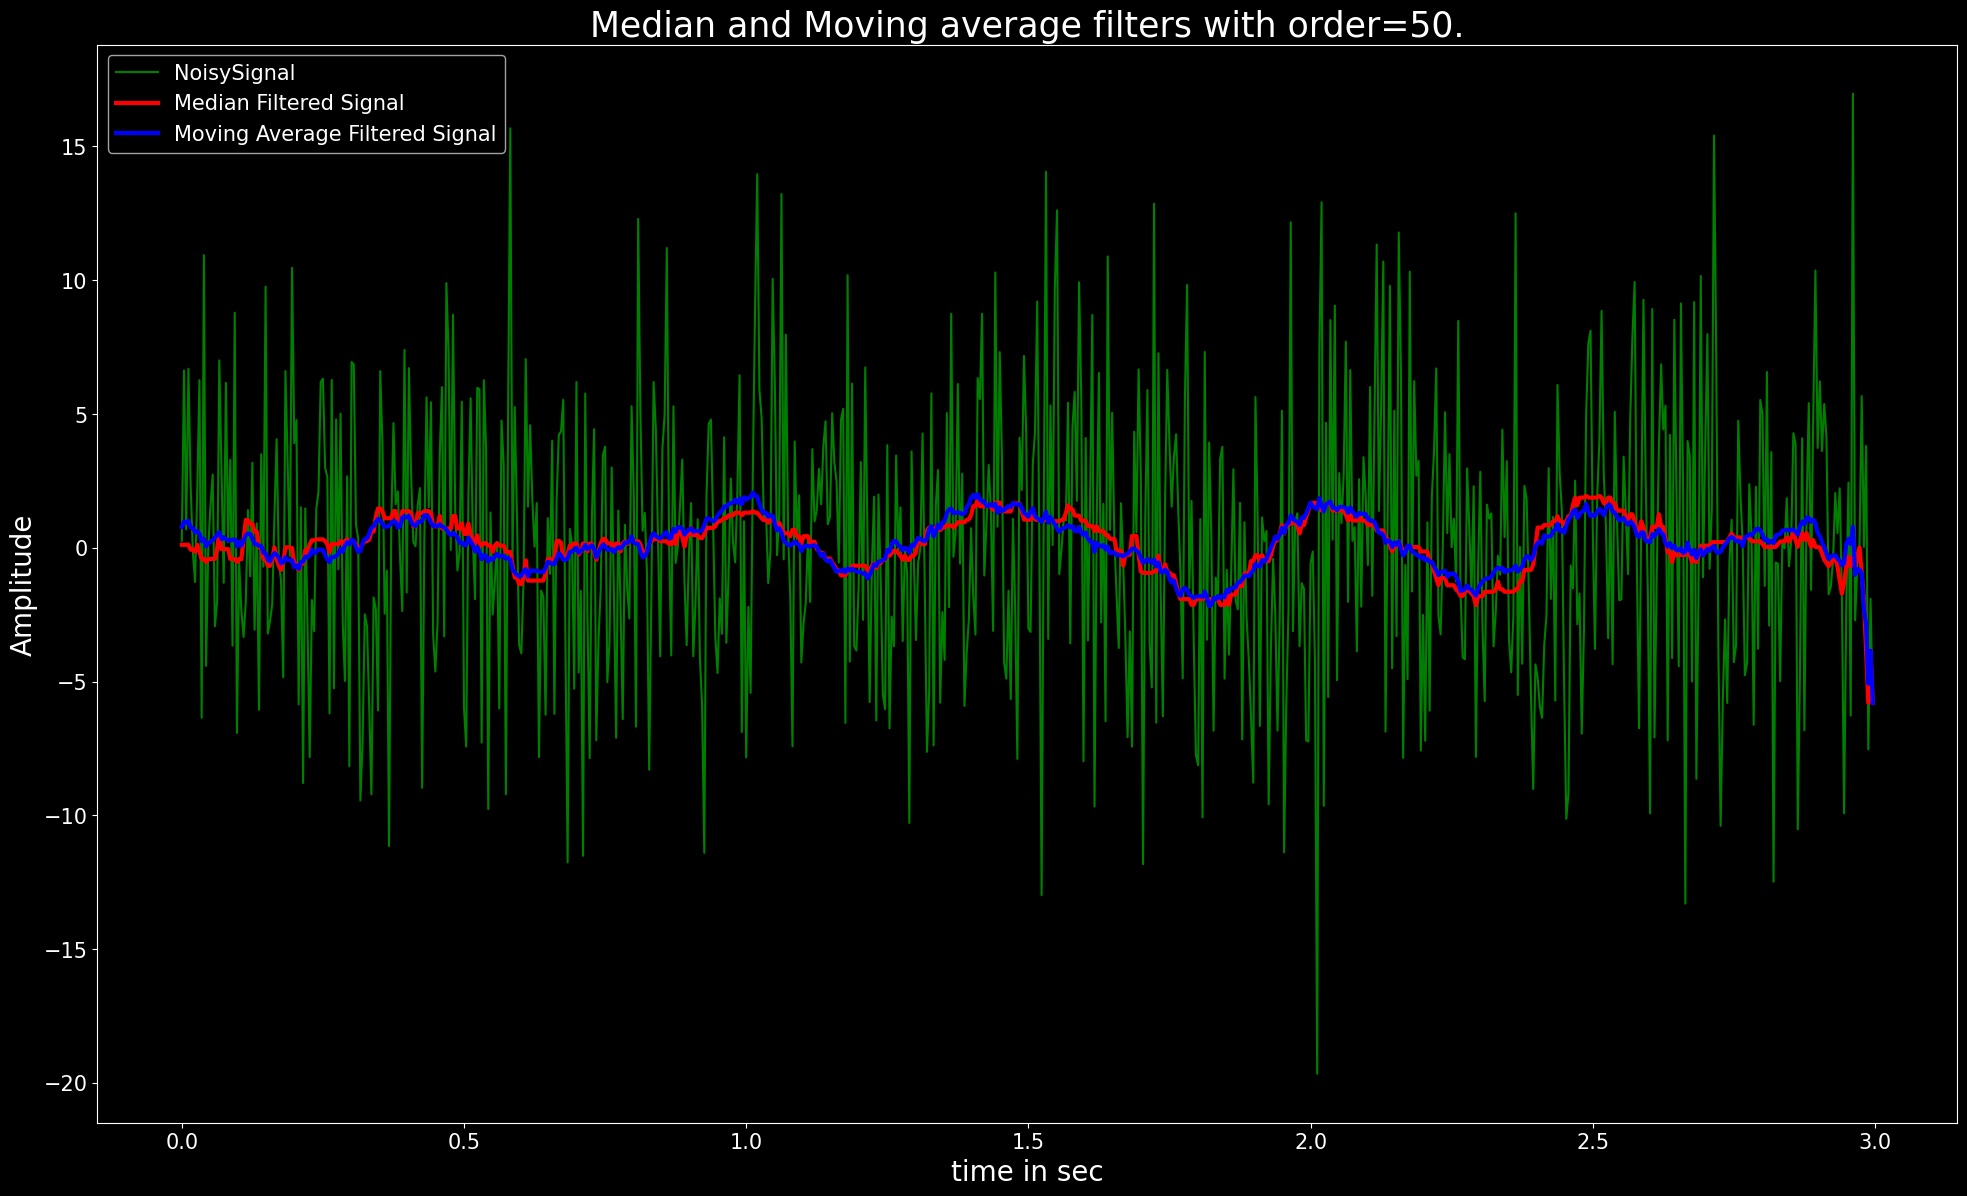

In [29]:
plt.figure(figsize = (24,14)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,signal,'g-',label = 'NoisySignal')
plt.plot(t,filt_sig,'r-',linewidth =3,label = 'Median Filtered Signal')
plt.plot(t,mean_filt_sig,'b-',linewidth = 3,label = 'Moving Average Filtered Signal')
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.title('Median and Moving average filters with order=%d.' %N, fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Recovering signal from noisy spikes by MedianFilter

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [32]:
signal = pd.read_csv('Spike.csv')

In [33]:
signal.head(10)

,-1.41E+00
0,-4.190
1,-2.240
2,-0.472
3,-2.490
4,0.784
5,-0.856
6,-1.380
7,0.595
8,-1.440
9,-2.470


In [34]:
signal = np.array(signal)

In [35]:
spiky = abs(signal)

In [36]:
len(spiky)

4999

In [37]:
spiky.shape

(4999, 1)

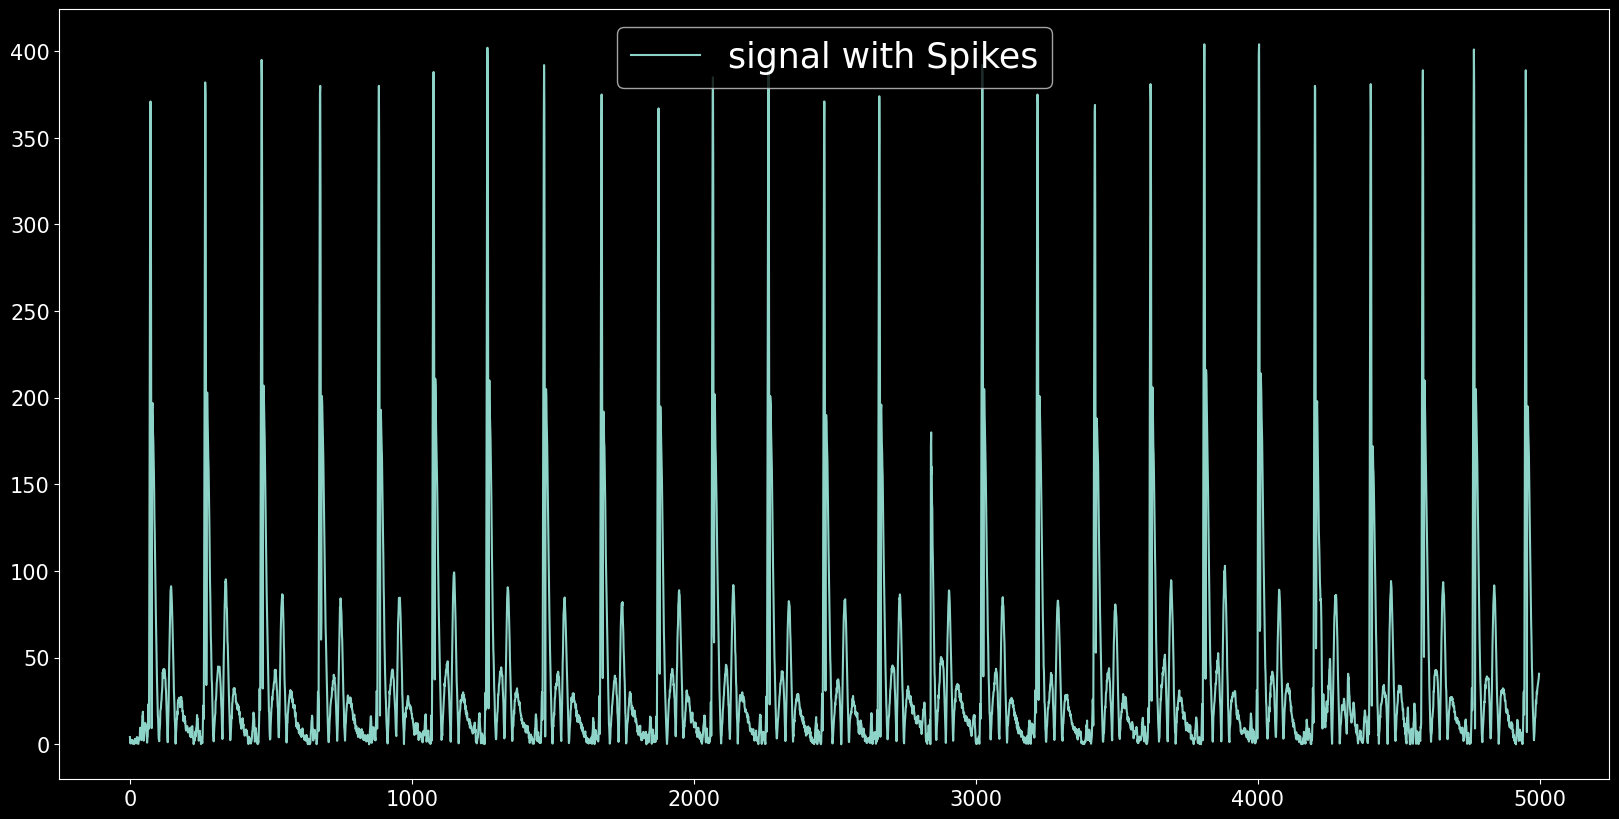

In [38]:
plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(spiky, label = 'signal with Spikes')
plt.legend(fontsize = 25)
plt.show()

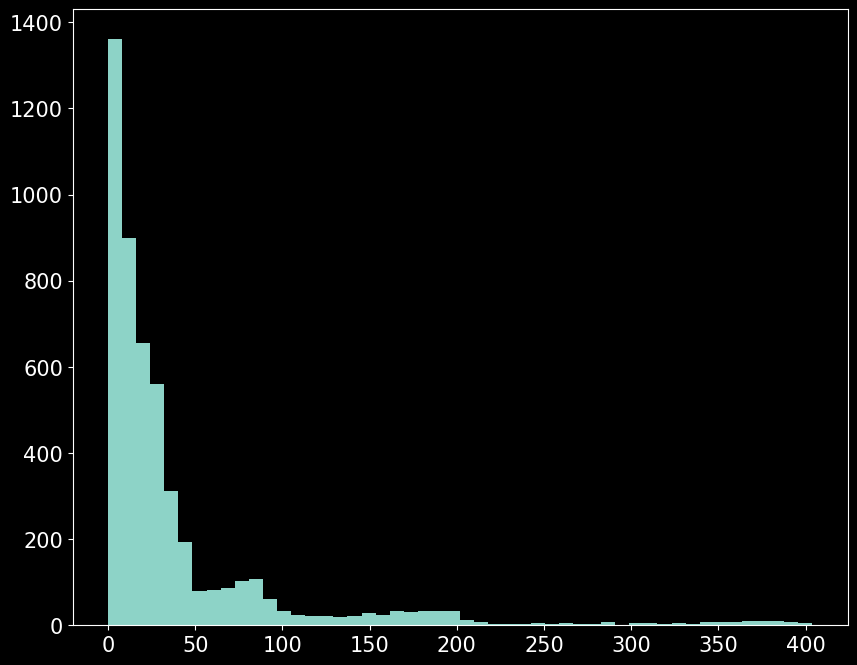

In [39]:
# use hist to pick threshold

plt.figure(figsize = (10,8))
plt.hist(spiky,50)
plt.show()

In [40]:
threshold = 50

### How to use np.where for 1D and 2D array (Practicing np.where)

In [41]:
# For 1D array

a = np.array([1,2,3,4,5,16,27,38,99,110])
print(a)
print(a.shape)
b= np.where(a>5)
print(b)

[  1   2   3   4   5  16  27  38  99 110]
(10,)
(array([5, 6, 7, 8, 9]),)


In [42]:
a[9]

110

In [43]:
# For 2D array

aa = np.array([1,2,3,4,5,16,27,38,99,110]).reshape(-1,1)
print(aa)
print(aa.shape)
bb= np.where(aa>5)
print(bb)

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [ 16]
 [ 27]
 [ 38]
 [ 99]
 [110]]
(10, 1)
(array([5, 6, 7, 8, 9]), array([0, 0, 0, 0, 0]))


In [44]:
len(bb)

2

In [45]:
aa = np.array([1,2,3,4,5,16,27,38,99,110]).reshape(-1,1)
print(aa)
print(aa.shape)
bb= np.where(aa>5)[0]
print(bb)

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [ 16]
 [ 27]
 [ 38]
 [ 99]
 [110]]
(10, 1)
[5 6 7 8 9]


### Using np.where to find the indices of spiky signal having magnitude greater than 50

In [46]:
threshold = 50

# find signal values above the threshold value
ultra_thresh = np.where(spiky > threshold)[0]


In [47]:
ultra_thresh

array([  69,   70,   71,   72,   73,   74,   75,   76,   78,   79,   80,
         81,   82,   83,   84,   85,   86,   87,   88,   89,   90,   91,
         92,   93,   94,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  149,  150,  151,  152,  153,  263,  264,  265,  266,  267,
        268,  269,  270,  272,  273,  274,  275,  276,  277,  278,  279,
        280,  281,  282,  283,  284,  285,  286,  287,  288,  333,  334,
        335,  336,  337,  338,  339,  340,  341,  342,  343,  344,  345,
        346,  347,  463,  464,  465,  466,  467,  468,  469,  470,  472,
        473,  474,  475,  476,  477,  478,  479,  480,  481,  482,  483,
        484,  485,  486,  487,  488,  489,  534,  535,  536,  537,  538,
        539,  540,  541,  542,  543,  544,  545,  546,  547,  670,  671,
        672,  673,  674,  675,  676,  677,  678,  679,  680,  681,  682,
        683,  684,  685,  686,  687,  688,  689,  690,  691,  692,  693,
        694,  695,  696,  742,  743,  744,  745,  7

In [48]:
len(ultra_thresh)

998

In [49]:
filtsig = np.copy(spiky)

N = 100

# Applying Median Filter

for ii in range(0,ultra_thresh.shape[0]):
    filtsig[ultra_thresh[ii]] = np.median(spiky[ultra_thresh[ii]:ultra_thresh[ii]+N])

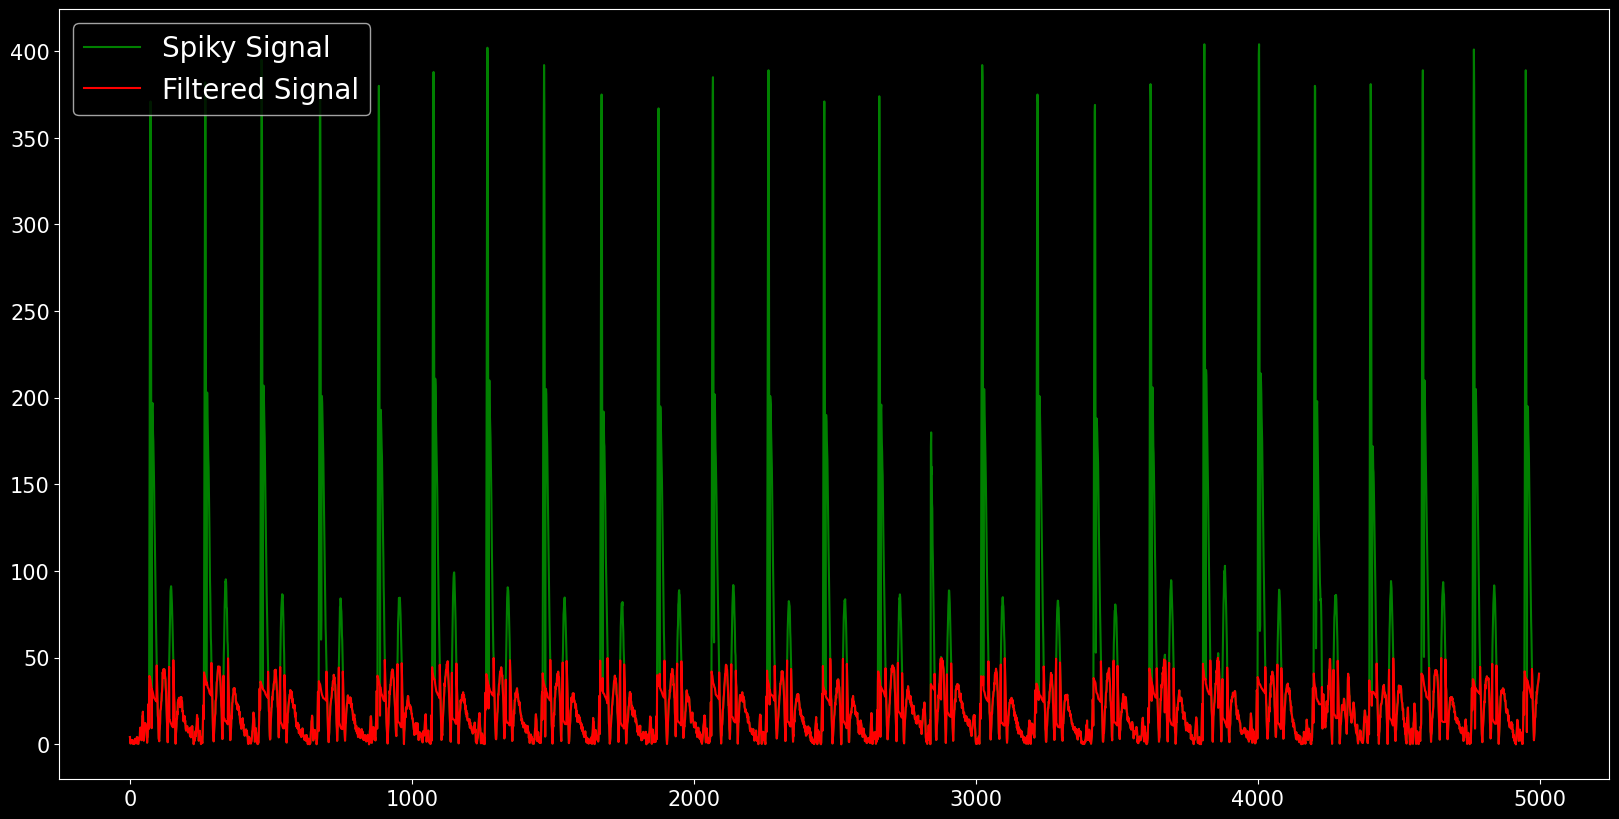

In [50]:
plt.figure(figsize =(20,10))
plt.plot(spiky,'g', label = 'Spiky Signal')
plt.plot(filtsig,'r', label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.show()